In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyBigWig
import random
from tqdm import tqdm

## INPUT VISUALIZATION

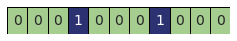

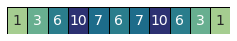

In [ ]:
vector = np.array([0, 0, 0, 1, 0, 0, 0, 1,0,0,0])
matrix = vector.reshape(1, -1)

plt.figure(figsize=(4, 0.5))

sns.heatmap(matrix, annot=True, fmt=".0f", cmap='crest', cbar=False,
            annot_kws={"size": 14}, linewidths=1, linecolor='black')
plt.axis('off')


vector = np.array([1, 3, 6, 10, 7, 6, 7, 10,6,3,1])
matrix = vector.reshape(1, -1)

plt.figure(figsize=(4, 0.5))
sns.heatmap(matrix, annot=True, fmt=".0f", cmap='crest', cbar=False,
            annot_kws={"size": 14}, linewidths=1, linecolor='black')
plt.axis('off')
plt.show()

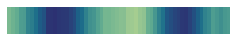

In [ ]:
outputseq = pd.read_pickle(f'../Data/SHUFFLED_out_shufseq_136.pkl')

vector = outputseq[0][0]
vector = vector[50:108]
matrix = vector.reshape(1, -1)

plt.figure(figsize=(4, 0.5))

sns.heatmap(matrix, annot=False, fmt=".0f", cmap='crest', cbar=False,
            annot_kws={"size": 10}, linewidths=0.0, linecolor='black')
plt.axis('off')
plt.show()

## CAGE

In [6]:
p = '../Data/Chr3_thal_cdsPOZ.bed'
t = pd.read_csv(p, sep='\t', header=None)
t.head(2)

,0,1,2,3,4,5
0,Chr3,4341,4342,AT3G01010.1,1,+
1,Chr3,5138,5139,AT3G01020.1,1,+


In [22]:
p = pyBigWig.open('../Data/wt.plus.bw')
p.chroms()

{'Chr1': 30427671,
 'Chr2': 19698289,
 'Chr3': 23459830,
 'Chr4': 18585056,
 'Chr5': 26975502,
 'ChrM': 366924,
 'ChrC': 154478}

In [23]:
val = []
for i in t.index:
  if t.loc[i][5] == '+': val.append(p.values(f'Chr{t.loc[i][0][-1]}', t.loc[i][1]-500, t.loc[i][1]+20))

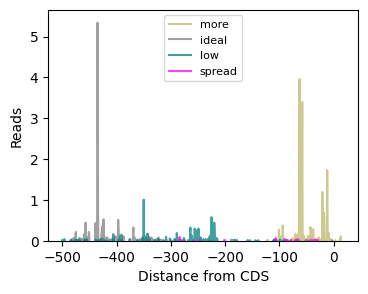

In [112]:
plt.figure(figsize=(4, 3))
cnt = 4
plts = []
colors = ['magenta', 'teal', 'gray', 'darkkhaki']
labels = ['spread', 'low', 'ideal', 'more']
for iv in [28, 3, 764, 30]:
  if cnt == 0: break
  v = val[iv]
  pl = np.nan_to_num(np.array(v), nan=-1)
  plts.append(pl)
  plt.plot([i for i in range(-500, 20)], pl, alpha=0.75, color=colors[cnt-1], label=f'{labels[cnt-1]}')
  cnt-=1
plt.xlabel('Distance from CDS')
plt.ylabel('Reads')
plt.ylim(0)
plt.legend(fontsize=8)
plt.show()

## TSS DATA

In [133]:
data = pd.read_pickle("../Data/NEWMERGEDDISTFILT_tss_thaliana_allsources.pkl")['+'][3]

In [163]:
valloc = []
for i in tqdm(t.index):
  if t.loc[i][5] != '+' or t.loc[i][1] < 5100 or t.loc[i][1] > 2345500: continue
  selection = [x - t.loc[i][1] for x in data if -500 < x - t.loc[i][1] < 20]
  if len(selection) < 1: continue
  valloc.append(selection)


100%|██████████| 2785/2785 [02:35<00:00, 17.90it/s]  


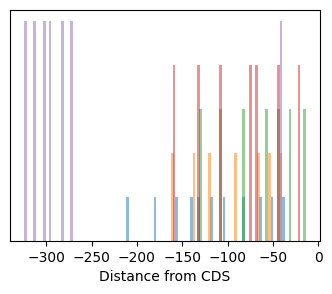

In [207]:
cnt = 1
plt.figure(figsize=(4,3))
for item in valloc:
  if len(item) > 6:
    plt.bar(item, height=cnt, alpha=0.5, width=3)
    cnt+=1
plt.xlabel("Distance from CDS")
ax = plt.gca()  # get current axes
ax.get_yaxis().set_visible(False)
plt.show()